# 0 - 9 classifier

#### Import required libraries

In [2]:
import cv2
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

import idx2numpy
import numpy as np

#### Input the training data

9


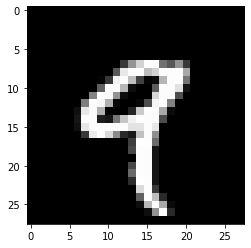

In [3]:
file1 = 'train-images.idx3-ubyte'
img_arr = idx2numpy.convert_from_file(file1)

file2 = 'train-labels.idx1-ubyte'
label = idx2numpy.convert_from_file(file2)

plt.imshow(img_arr[4],cmap='gray')
print(label[4])

#### Convert img (unit8) to array (int)

In [4]:
trainx = tf.keras.preprocessing.image.img_to_array(img_arr)

#### Resize 28 X 28 image into 50 X 50

In [5]:
x_train = []
for im in trainx:
    x_train.append(cv2.resize(im,(50,50)))
    
x_train = np.stack(x_train)

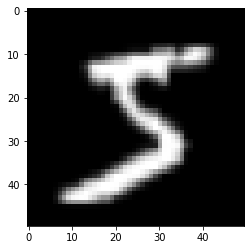

In [6]:
plt.imshow(x_train[0],cmap = 'gray')

In [14]:
y_train = to_categorical(label, 10)
train_x = x_train.reshape((60000,50,50,1))
train_y = y_train.reshape((60000,10))

#### Data Augumentation

In [12]:
datagen = ImageDataGenerator( 
        rotation_range = 10, 
        zoom_range = 0.1, 
        brightness_range = (0.5, 1.5)) 

#### How is data distributed?

In [28]:
unique, counts = np.unique(label, return_counts=True)

print (np.asarray((unique, counts)).T)
print(np.mean(counts))

[[   0 5923]
 [   1 6742]
 [   2 5958]
 [   3 6131]
 [   4 5842]
 [   5 5421]
 [   6 5918]
 [   7 6265]
 [   8 5851]
 [   9 5949]]
6000.0


As all of the classes have almost equal training examples, accuracy will be a good metric to evaluate our model

#### Build the model

In [32]:
tf.random.set_seed(1234)
es=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5) # to prevent overfitting

model=tf.keras.Sequential(
[
    layers.Conv2D(filters=9, kernel_size=(3, 3), activation='relu', padding='same'),    
    layers.MaxPooling2D(pool_size=(3, 3)),
    layers.Dropout(0.4),
    
    layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', padding='same'),    
    layers.Dropout(0.4),
    
    
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

model.compile(loss='CategoricalCrossentropy',optimizer='adam',metrics = ['accuracy'] )

model.fit(datagen.flow(train_x,train_y),epochs = 40, callbacks=[es])

Epoch 1/40
1875/1875 [==============================] - 64s 34ms/step - loss: 1.5431 - accuracy: 0.6093
Epoch 2/40
1875/1875 [==============================] - 67s 36ms/step - loss: 0.3319 - accuracy: 0.90220s - loss: 0.3
Epoch 3/40
1875/1875 [==============================] - 77s 41ms/step - loss: 0.2271 - accuracy: 0.9326
Epoch 4/40
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1924 - accuracy: 0.9435
Epoch 5/40
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1702 - accuracy: 0.9493
Epoch 6/40
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1622 - accuracy: 0.9532
Epoch 7/40
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1513 - accuracy: 0.9554
Epoch 8/40
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1466 - accuracy: 0.9572
Epoch 9/40
1875/1875 [==============================] - 67s 36ms/step - loss: 0.1461 - accuracy: 0.9566
Epoch 10/40
1875/1875 [===========================

In [33]:
model.save("weights.h5")